In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv('character-predictions_pose.csv')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   plod               1946 non-null   float64
 2   name               1946 non-null   object 
 3   title              938 non-null    object 
 4   male               1946 non-null   int64  
 5   culture            677 non-null    object 
 6   dateOfBirth        433 non-null    float64
 7   DateoFdeath        444 non-null    float64
 8   mother             21 non-null     object 
 9   father             26 non-null     object 
 10  heir               23 non-null     object 
 11  house              1519 non-null   object 
 12  spouse             276 non-null    object 
 13  book1              1946 non-null   int64  
 14  book2              1946 non-null   int64  
 15  book3              1946 non-null   int64  
 16  book4              1946 

In [96]:
df.head()

,S.No,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [97]:
df['title'].value_counts(normalize=True).reset_index()['title'].sum()

1.0

In [98]:
df.shape[0]

1946

Column preprocessing ideas:

* name: Drop.

* title: Use instances with a number of instances above a certain threshold.

* plod: Drop (target variable probability).

* culture: Use instances with a number of instances above a certain threshold.

* mother: Extract the family name.

* father: Extract the family name.

* heir: Could be dropped.

* house: Use instances with a number of instances above a certain threshold.

* spouse: Extract the family name (or drop).

* isAliveMother: Could be dropped.

* isAliveFather: Could be dropped.

* isAliveHeir: Could be dropped.

* isAliveSpouse: Could be dropped.

In [89]:
df.isna().mean()

S.No                 0.000000
plod                 0.000000
name                 0.000000
title                0.517986
male                 0.000000
culture              0.652107
dateOfBirth          0.777492
DateoFdeath          0.771840
mother               0.989209
father               0.986639
heir                 0.988181
house                0.219424
spouse               0.858171
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isAliveMother        0.989209
isAliveFather        0.986639
isAliveHeir          0.988181
isAliveSpouse        0.858171
isMarried            0.000000
isNoble              0.000000
age                  0.777492
numDeadRelations     0.000000
boolDeadRelations    0.000000
isPopular            0.000000
popularity           0.000000
isAlive              0.000000
dtype: float64

In [90]:
def preprocess_inputs(df):

  df = df.copy()

  # Drop columns

  drop_cols = ['S.No',
               'plod',
               'name',
               'heir',
               'isAliveMother',
               'isAliveFather',
               'isAliveHeir',
               'isAliveSpouse',
               'father',
               'mother',
               'spouse',
               'age',
               'DateoFdeath']

  df = df.drop(drop_cols,axis=1)


  # Fill NaN values

  df['title'] = df['title'].fillna('No Title')
  df['house'] = df['house'].fillna('No House')
  df['dateOfBirth'] = df['dateOfBirth'].fillna(df['dateOfBirth'].median())
  df['culture'] = df['culture'].fillna('Unknown')



  # Group less frequent instances

  less_frequent_cols = ['title','culture','house']

  keep_instances_dict = {}

  for col in less_frequent_cols:
    keep_instances = df[col].value_counts(normalize=True).reset_index().head(11)['index'].tolist()

    keep_instances_dict[col] = keep_instances

    df[col] = df[col].apply(lambda x: x if x in keep_instances_dict[col] else 'Other')


  return df

In [91]:
X = preprocess_inputs(df)

X.isna().sum()

title                0
male                 0
culture              0
dateOfBirth          0
house                0
book1                0
book2                0
book3                0
book4                0
book5                0
isMarried            0
isNoble              0
numDeadRelations     0
boolDeadRelations    0
isPopular            0
popularity           0
isAlive              0
dtype: int64

In [92]:
X

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,No Title,1,Unknown,268.0,No House,0,0,0,0,0,0,0,11,1,1,0.605351,0
1,Other,1,Rivermen,208.0,House Frey,1,1,1,1,1,1,1,1,1,1,0.896321,1
2,Ser,1,Unknown,268.0,Other,0,0,0,1,0,0,1,0,0,0,0.267559,1
3,Other,0,Unknown,82.0,Other,0,0,0,0,0,1,1,0,0,0,0.183946,0
4,Other,0,Dornish,276.0,Other,0,0,0,1,0,1,1,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,No Title,1,Other,268.0,House Stark,1,1,1,1,1,0,0,0,0,1,0.351171,0
1942,No Title,1,Unknown,268.0,Other,0,1,0,1,1,0,0,0,0,0,0.096990,0
1943,No Title,1,Unknown,268.0,No House,1,1,1,1,1,0,0,0,0,0,0.030100,1
1944,No Title,1,Unknown,268.0,Other,0,0,1,1,1,0,0,0,0,0,0.130435,1


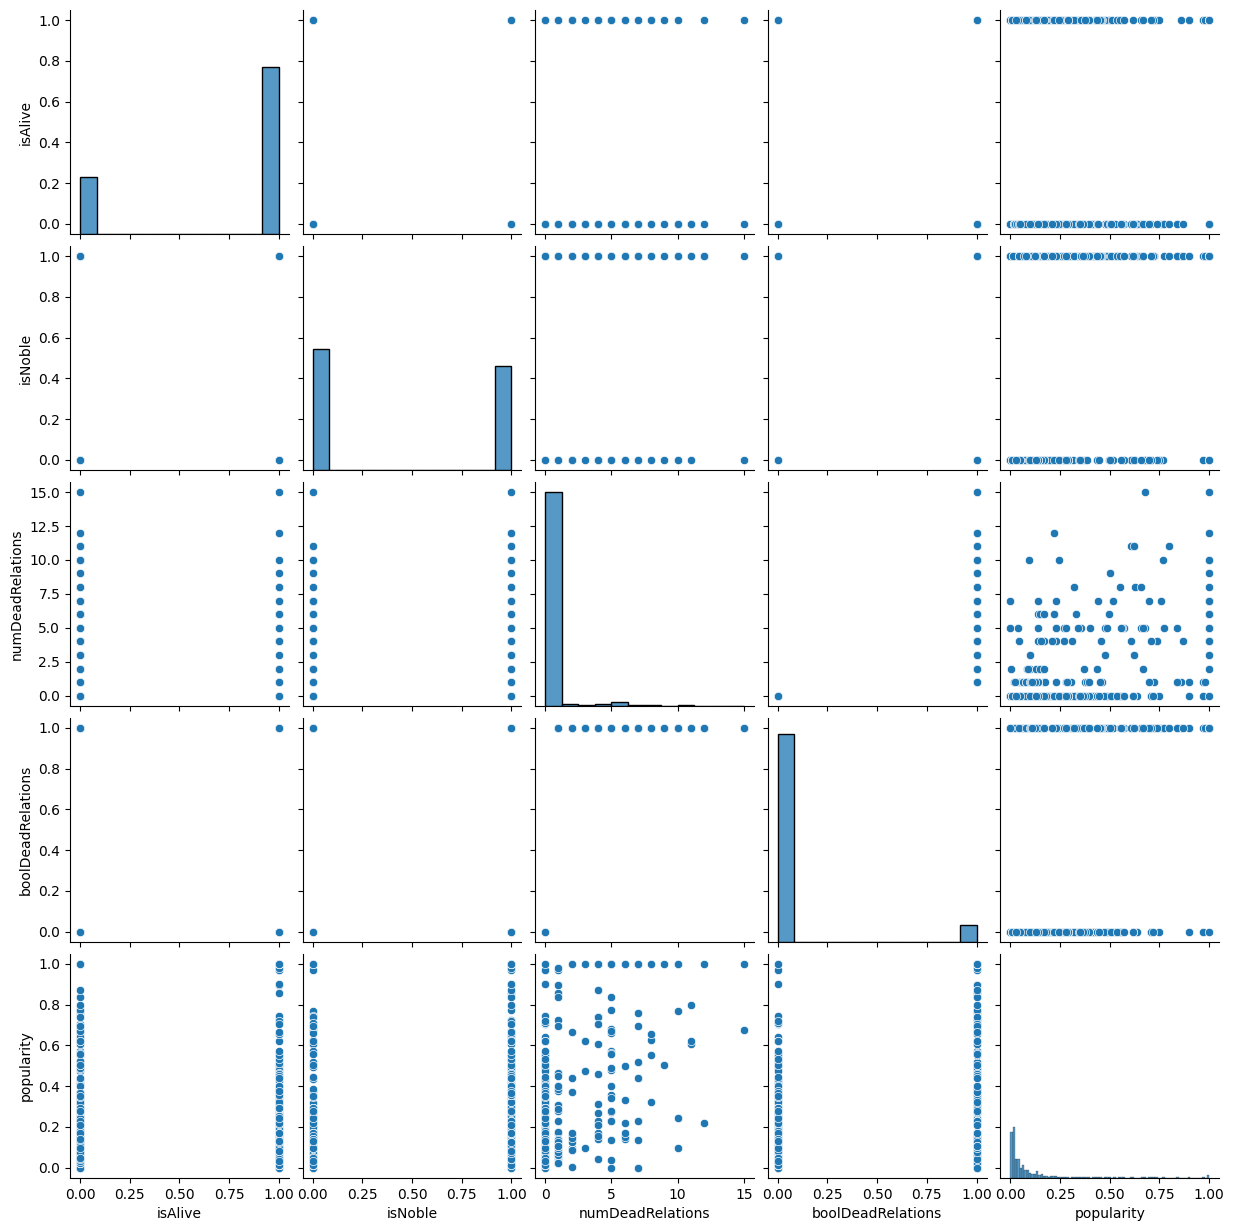

In [125]:
sns.pairplot(X.select_dtypes(['int','float'])[['isAlive','isNoble','numDeadRelations','boolDeadRelations','popularity']])

<ipython-input-119-96cc86bb9847>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(X.corr()[['isAlive']].sort_values(by='isAlive', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PuOr')


Text(0.5, 1.0, 'Features Correlating isAlive')

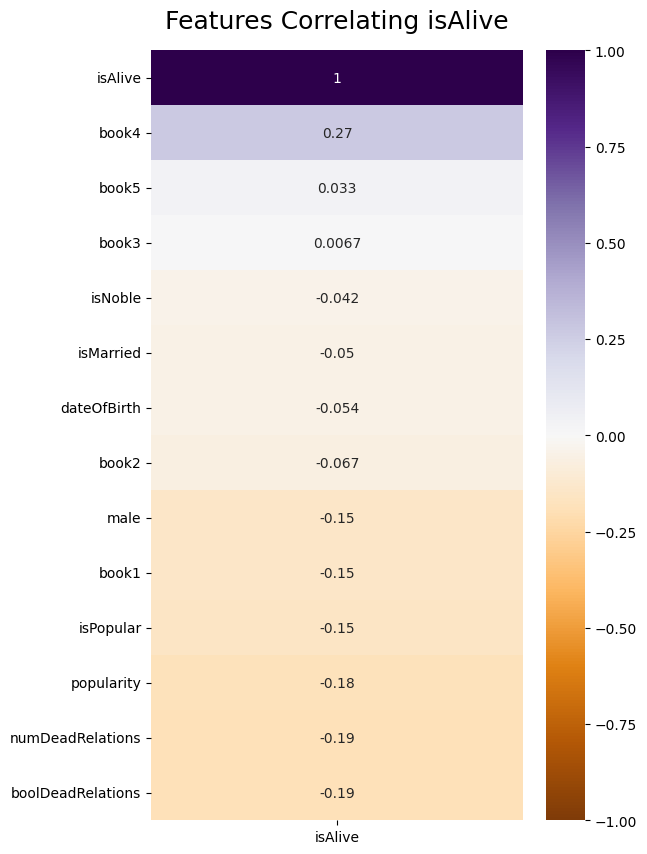

In [119]:
plt.figure(figsize=(6, 10))
heatmap = sns.heatmap(X.corr()[['isAlive']].sort_values(by='isAlive', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PuOr')
heatmap.set_title('Features Correlating isAlive', fontdict={'fontsize':18}, pad=16)

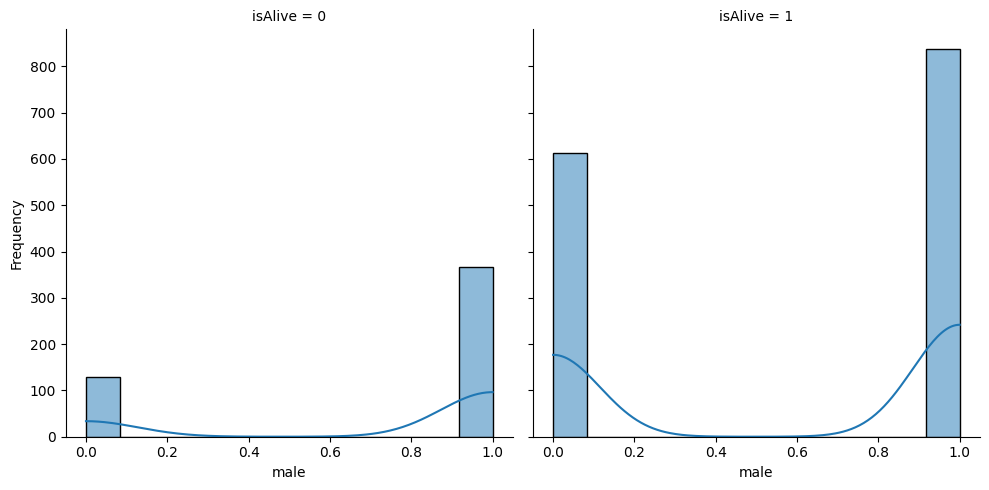

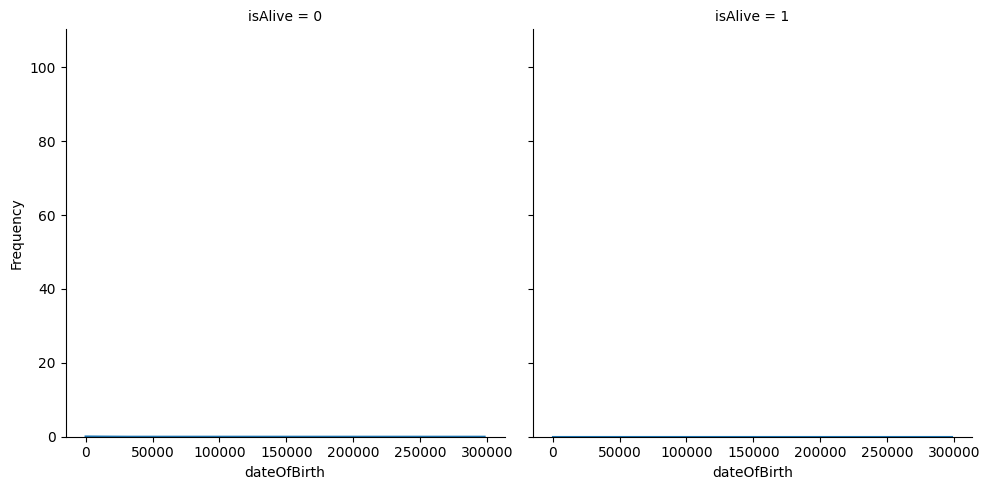

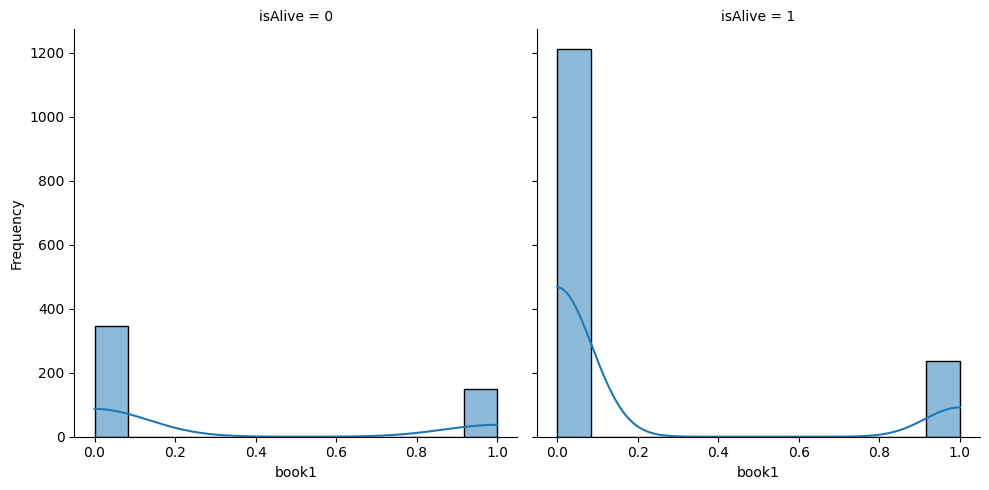

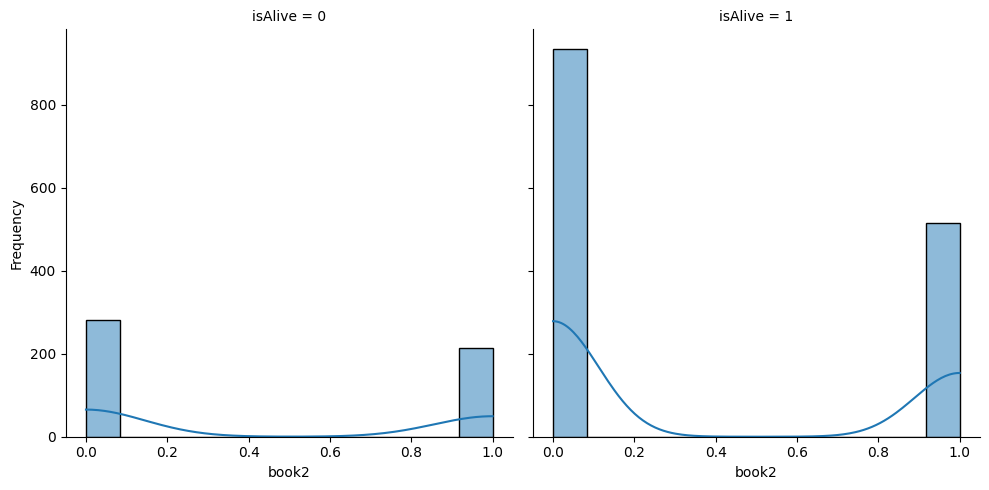

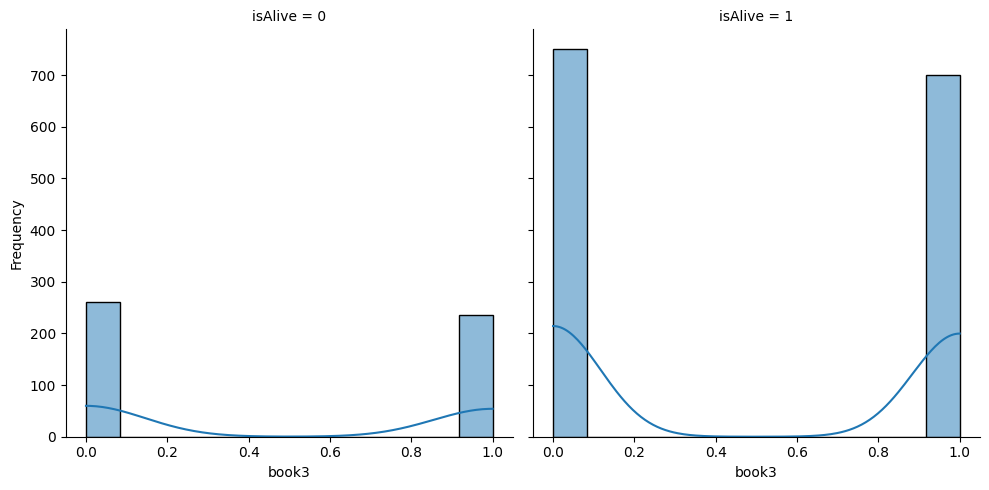

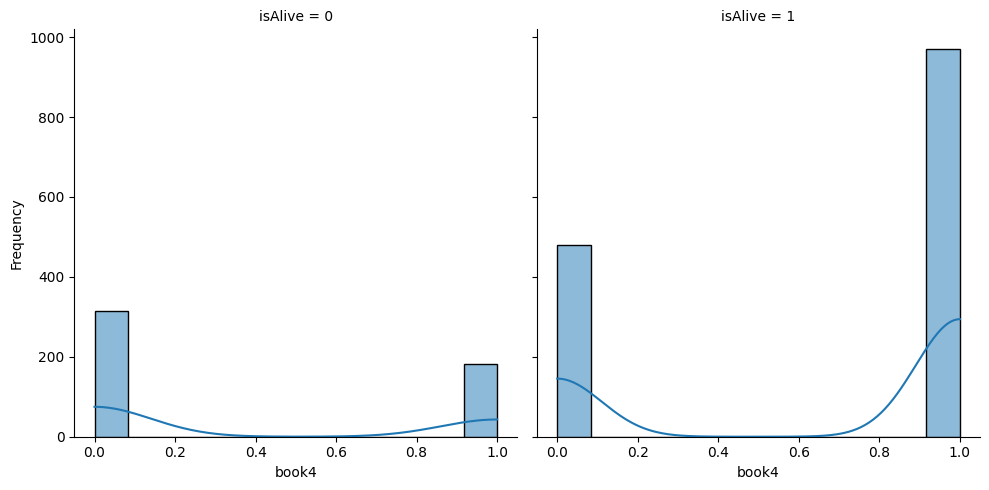

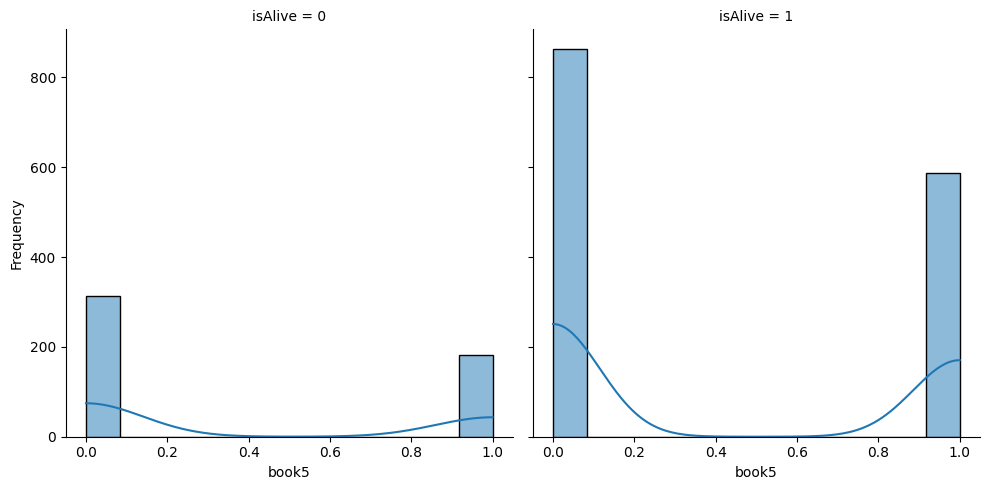

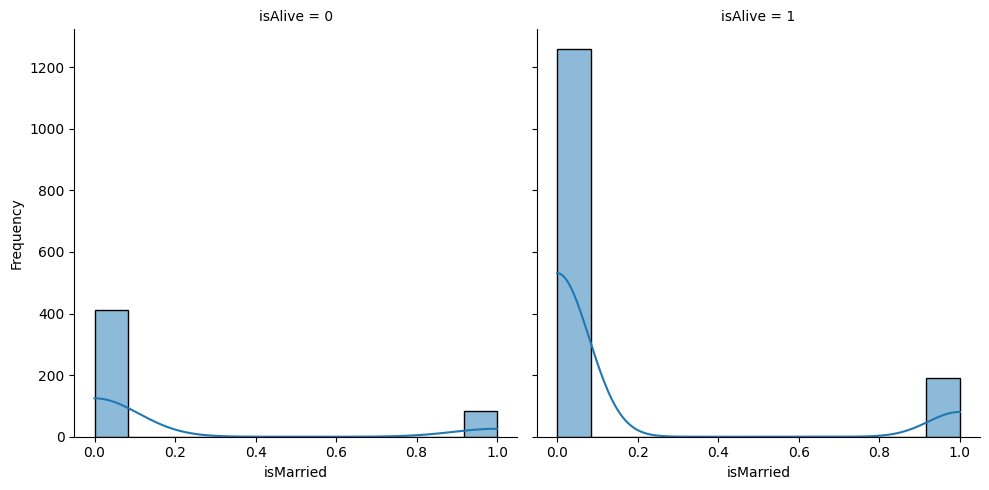

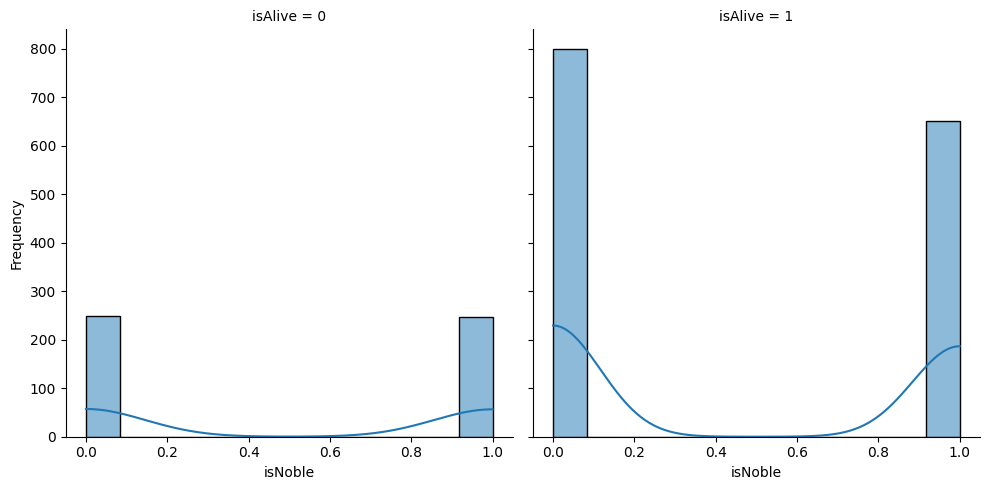

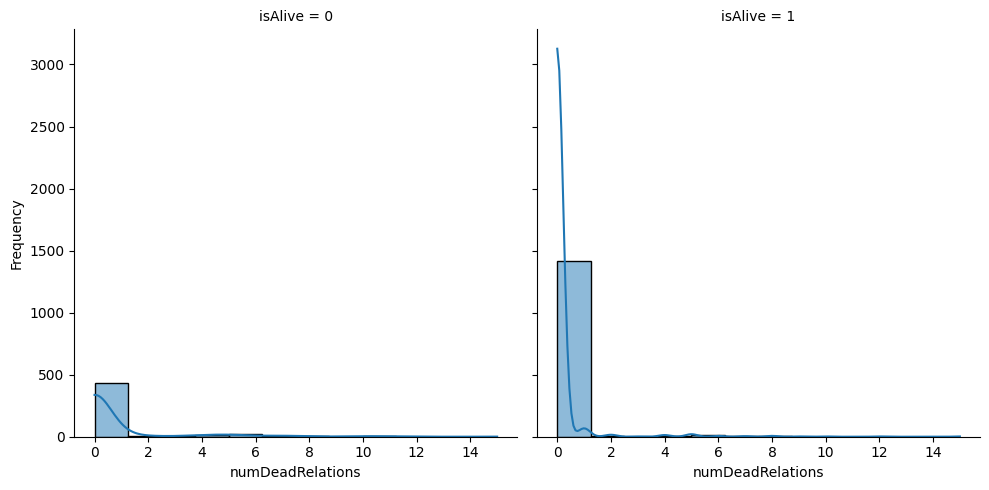

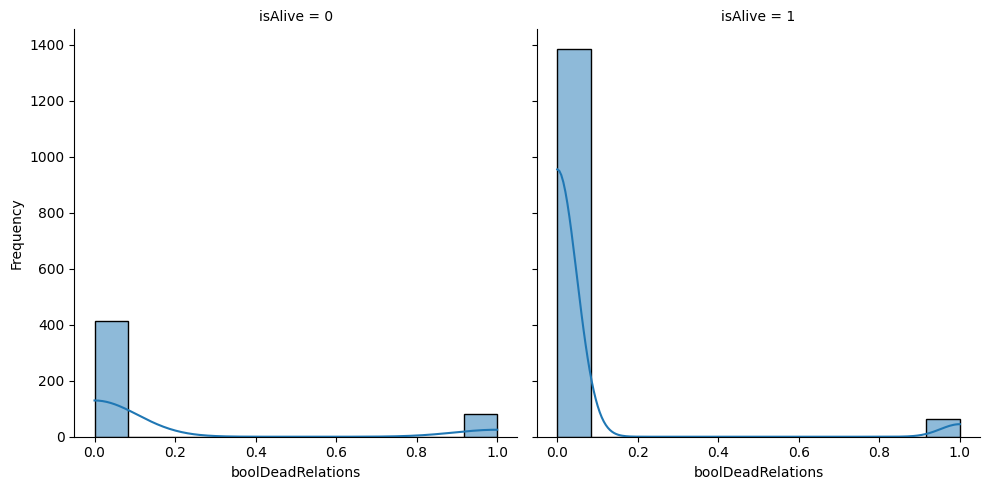

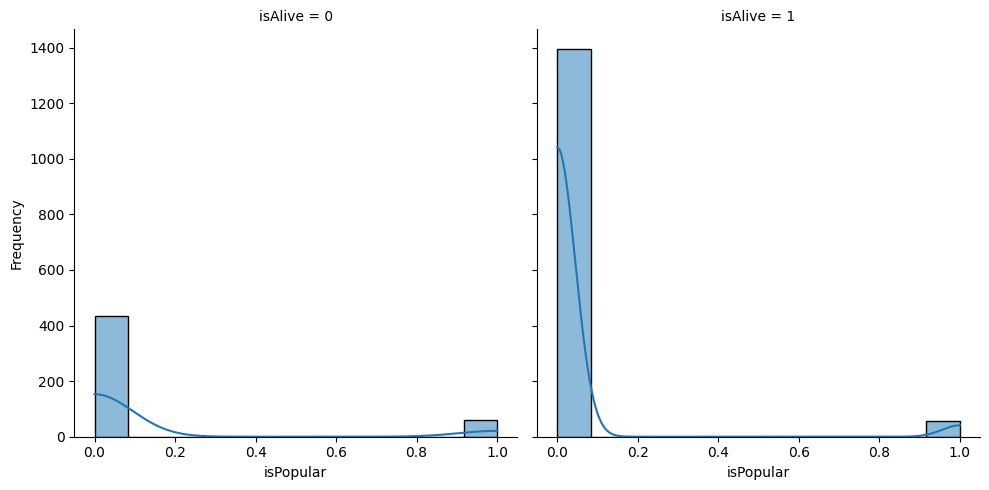

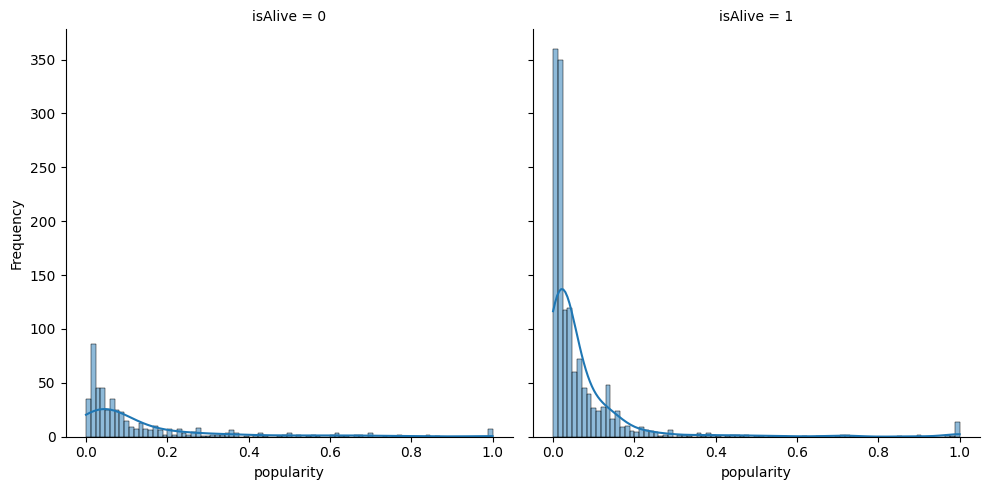

In [127]:
for column in X.drop('isAlive', axis=1).select_dtypes(['int','float']):
    g = sns.displot(df, x=column, col='isAlive', kde=True)
    g.set_axis_labels(f"{column}", "Frequency")
    plt.show()